<a href="https://colab.research.google.com/github/Sarayu-123/-FUTURE_ML_01-/blob/main/TASK_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [52]:
import zipfile
import os

# Get the name of the uploaded zip file
zip_file_path = list(uploaded.keys())[0]

# Create a directory to unzip the file
output_dir = '/content/superstore_data'
os.makedirs(output_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# List the files in the output directory to verify the contents
extracted_files = os.listdir(output_dir)
print("Files extracted:", extracted_files)


Files extracted: ['Sample - Superstore.csv']


In [9]:
# List the files in the extraction directory
extracted_files = os.listdir(output_dir)
print("Files extracted:", extracted_files)


Files extracted: ['Sample - Superstore.csv']


In [13]:
# Load the CSV file with 'ISO-8859-1' encoding
sales_data = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# Display the first few rows of the data
sales_data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# Check the first few rows of the sales data
sales_data.head()

# Convert 'Order Date' column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

# Set 'Order Date' as the index for time series analysis
sales_data.set_index('Order Date', inplace=True)

# Fill missing values if any
sales_data.fillna(method='ffill', inplace=True)

# Aggregate sales data by month (or 'D' for daily sales)
monthly_sales = sales_data.resample('M').sum()  # 'M' stands for month

# Display the first few rows of the monthly sales data
monthly_sales.head()


/tmp/ipython-input-2417833295.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sales_data.fillna(method='ffill', inplace=True)
/tmp/ipython-input-2417833295.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_data.resample('M').sum()  # 'M' stands for month


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-31,346176,CA-2014-103800CA-2014-112326CA-2014-112326CA-2...,1/7/20141/8/20141/8/20141/8/20141/12/20141/8/2...,Standard ClassStandard ClassStandard ClassStan...,DP-13000PO-19195PO-19195PO-19195MB-18085LS-172...,Darren PowersPhillina OberPhillina OberPhillin...,ConsumerHome OfficeHome OfficeHome OfficeConsu...,United StatesUnited StatesUnited StatesUnited ...,HoustonNapervilleNapervilleNapervillePhiladelp...,TexasIllinoisIllinoisIllinoisPennsylvaniaCalif...,4342297,CentralCentralCentralCentralEastWestSouthSouth...,OFF-PA-10000174OFF-LA-10003223OFF-ST-10002743O...,Office SuppliesOffice SuppliesOffice SuppliesO...,PaperLabelsStorageBindersArtPaperArtChairsBind...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",14236.895,284,10.00,2450.1907
2014-02-28,272235,CA-2014-140795CA-2014-139857CA-2014-123400CA-2...,2/3/20142/6/20142/9/20142/9/20142/6/20142/6/20...,First ClassStandard ClassStandard ClassStandar...,BD-11500CD-12790EB-13930EB-13930TB-21400TB-214...,Bradley DruckerCynthia DelaneyEric BarretoEric...,ConsumerHome OfficeConsumerConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,Green BaySan DiegoSaint PetersburgSaint Peters...,WisconsinCaliforniaFloridaFloridaWashingtonWas...,3049775,CentralWestSouthSouthWestWestWestWestWestSouth...,TEC-AC-10001432OFF-FA-10001843OFF-BI-10000666T...,TechnologyOffice SuppliesOffice SuppliesTechno...,AccessoriesFastenersBindersPhonesBindersBinder...,Enermax Aurora Lite KeyboardStaplesSurelock Po...,4519.892,159,8.10,862.3084
2014-03-31,871575,CA-2014-104269US-2014-143707CA-2014-113880CA-2...,3/6/20143/5/20143/5/20143/5/20143/5/20143/5/20...,Second ClassStandard ClassStandard ClassStanda...,DB-13060HR-14770VF-21715VF-21715SC-20380SC-203...,Dave BrooksHallie RedmondVicky FreymannVicky F...,ConsumerHome OfficeHome OfficeHome OfficeConsu...,United StatesUnited StatesUnited StatesUnited ...,SeattleNew York CityElmhurstElmhurstEl PasoEl ...,WashingtonNew YorkIllinoisIllinoisTexasTexasTe...,8314538,WestEastCentralCentralCentralCentralCentralCen...,FUR-CH-10004063TEC-PH-10003655FUR-CH-10000863O...,FurnitureTechnologyFurnitureOffice SuppliesOff...,ChairsPhonesChairsPaperFastenersChairsFurnishi...,Global Deluxe High-Back Manager's ChairSannysi...,55691.009,585,26.30,498.7299
2014-04-30,690625,US-2014-157021US-2014-157021CA-2014-138359CA-2...,4/6/20144/6/20144/6/20144/6/20144/8/20144/8/20...,Second ClassSecond ClassStandard ClassStandard...,KM-16720KM-16720KH-16330KH-16330RD-19585RD-195...,Kunst MillerKunst MillerKatharine HarmsKathari...,ConsumerConsumerCorporateCorporateConsumerCons...,United StatesUnited StatesUnited StatesUnited ...,VallejoVallejoRevereRevereAthensAthensAthensHo...,CaliforniaCaliforniaMassachusettsMassachusetts...,7723827,WestWestEastEastSouthSouthSouthCentralCentralS...,OFF-LA-10002312OFF-BI-10000042OFF-ST-10000636O...,Office SuppliesOffice SuppliesOffice SuppliesO...,LabelsBindersStorageBindersPaperPhonesApplianc...,"Avery 490Pressboard Data Binder, Crimson, 12"" ...",28295.345,536,14.85,3488.8352
2014-05-31,611708,CA-2014-115056CA-2014-124618CA-2014-130274CA-2...,5/2/20145/4/20145/5/20145/10/20145/10/20145/8/...,Same DaySecond ClassFirst ClassStandard ClassS...,AR-10510CS-11860JS-15940NC-18415NC-18415PM-189...,Andrew RobertsCari SchnellingJoni SundaresamNa...,ConsumerConsumerHome OfficeConsumerConsumerCon...,United StatesUnited StatesUnited StatesUnited ...,ColumbusLakelandAppletonYonkersYonkersJacksonM...,OhioFloridaWisconsinNew YorkNew YorkMichiganCo...,6497804,EastSouthCentralEastEastCentralEastCentralCent...,OFF-AP-10003971TEC-CO-10004202OFF-LA-10002195O...,Office SuppliesTechnologyOffice SuppliesOffice...,AppliancesCopiersLabelsBindersBindersBindersFu...,Belkin 6 Outlet Metallic Surge StripBrother DC...,23648.287,466,18.95,2738.7096


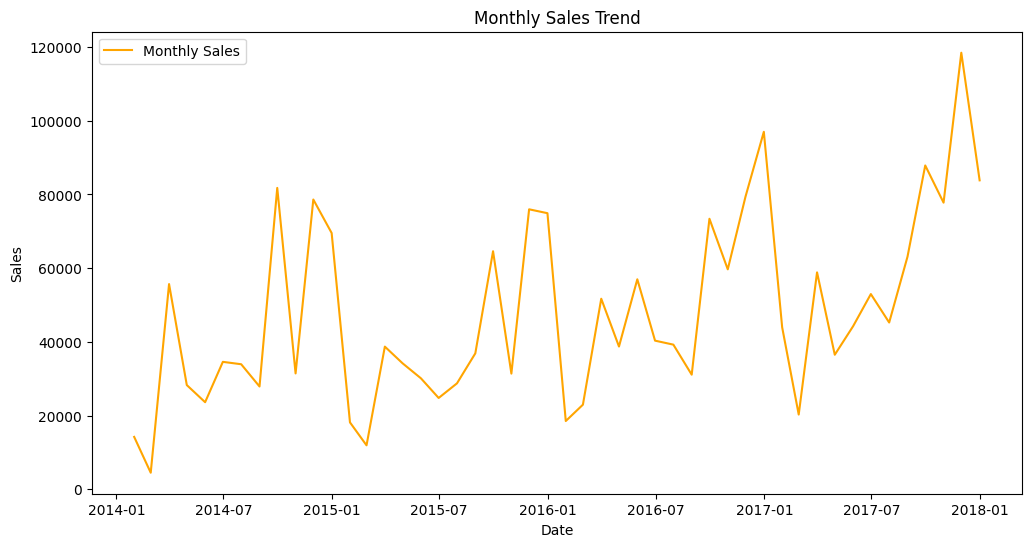

In [15]:
import matplotlib.pyplot as plt

# Plot the monthly sales data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Monthly Sales', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [16]:
!pip install prophet


In [22]:
# Check the column names in the dataset
print(sales_data.columns)


Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [23]:
# Inspect the first few rows of the dataset
print(sales_data.head())


            Row ID        Order ID   Ship Date       Ship Mode Customer ID  \
Order Date                                                                   
2016-11-08       1  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-11-08       2  CA-2016-152156  11/11/2016    Second Class    CG-12520   
2016-06-12       3  CA-2016-138688   6/16/2016    Second Class    DV-13045   
2015-10-11       4  US-2015-108966  10/18/2015  Standard Class    SO-20335   
2015-10-11       5  US-2015-108966  10/18/2015  Standard Class    SO-20335   

              Customer Name    Segment        Country             City  \
Order Date                                                               
2016-11-08      Claire Gute   Consumer  United States        Henderson   
2016-11-08      Claire Gute   Consumer  United States        Henderson   
2016-06-12  Darrin Van Huff  Corporate  United States      Los Angeles   
2015-10-11   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
2015-10-1

In [24]:
# Remove leading/trailing spaces from column names
sales_data.columns = sales_data.columns.str.strip()

# Check the columns again
print(sales_data.columns)


Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [28]:
# Check the first few rows of prophet_data
print(prophet_data.head())


          ds          y
0 2014-01-31  13275.131
1 2014-02-28   5406.528
2 2014-03-31  50708.349
3 2014-04-30  30388.465
4 2014-05-31  22478.880


In [30]:
prophet_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)


In [32]:
import prophet
print(prophet.__version__)


1.1.7


In [39]:
from prophet import Prophet
model=Prophet(daily_seasonality=True,yearly_seasonality=True)
model.fit(prophet_data)

09:26:41 - cmdstanpy - INFO - Chain [1] start processing
09:26:41 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
future=model.make_future_dataframe(periods=180)
forecast=model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
224,2018-07-26,93184.099967,83072.662804,103909.395031
225,2018-07-27,83733.510681,72902.096830,93975.058535
226,2018-07-28,74856.194685,64843.628078,85724.045504
227,2018-07-29,66753.290118,56467.703202,77020.804243
228,2018-07-30,59599.910001,48969.143199,70303.734042


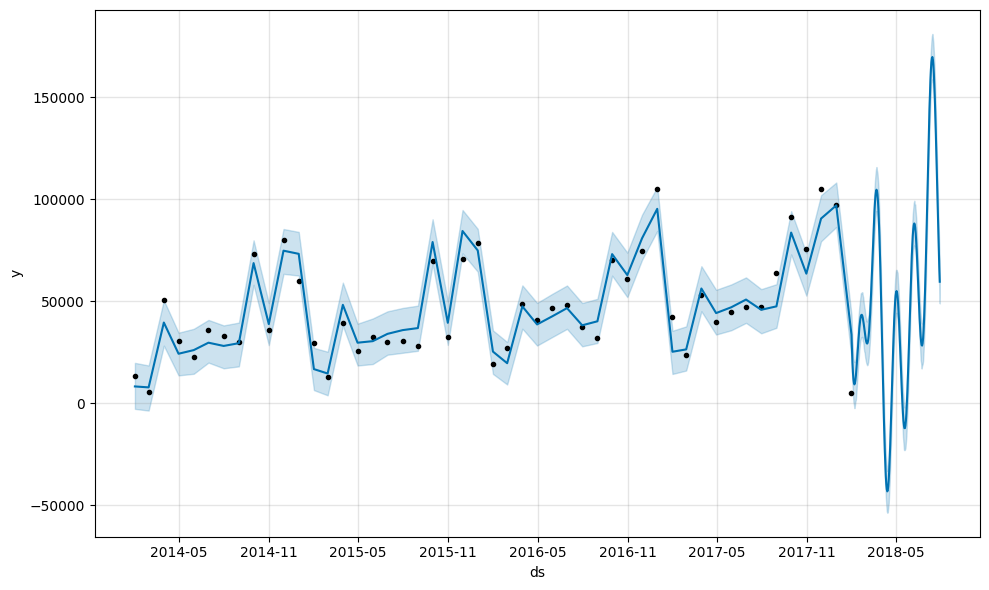

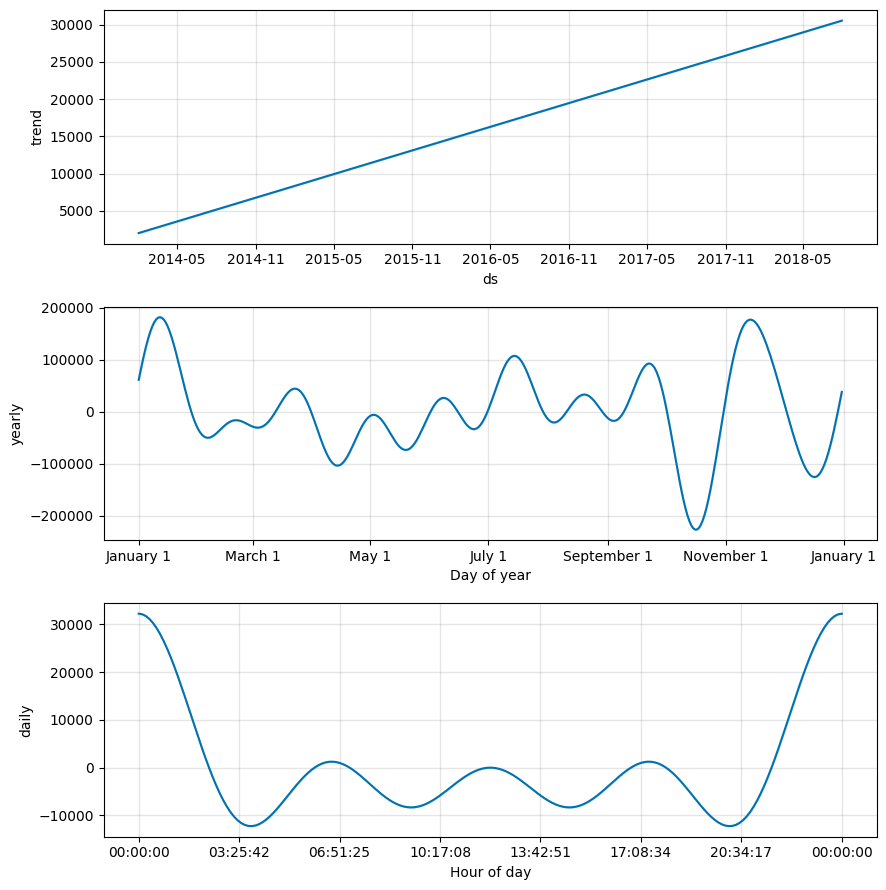

In [42]:
import matplotlib.pyplot as plt
fig1=model.plot(forecast)
plt.show()
fig2=model.plot_components(forecast)
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
merged=prophet_data.merge(forecast[['ds','yhat']],on='ds')
mae=mean_absolute_error(merged['y'],merged['yhat'])
rmse=np.sqrt(mean_squared_error(merged['y'],merged['yhat']))
print("Mean Absolute Error  (MAE):",mae)
print("Root Mean Squared Error (RMSE):",rmse)

Mean Absolute Error  (MAE): 6424.904948211606
Root Mean Squared Error (RMSE): 8346.55473188949


In [44]:
forecast.to_csv("superstore_forecast.csv",index=False)
prophet_data.to_csv("superstore_actual_salescsv",index=False)

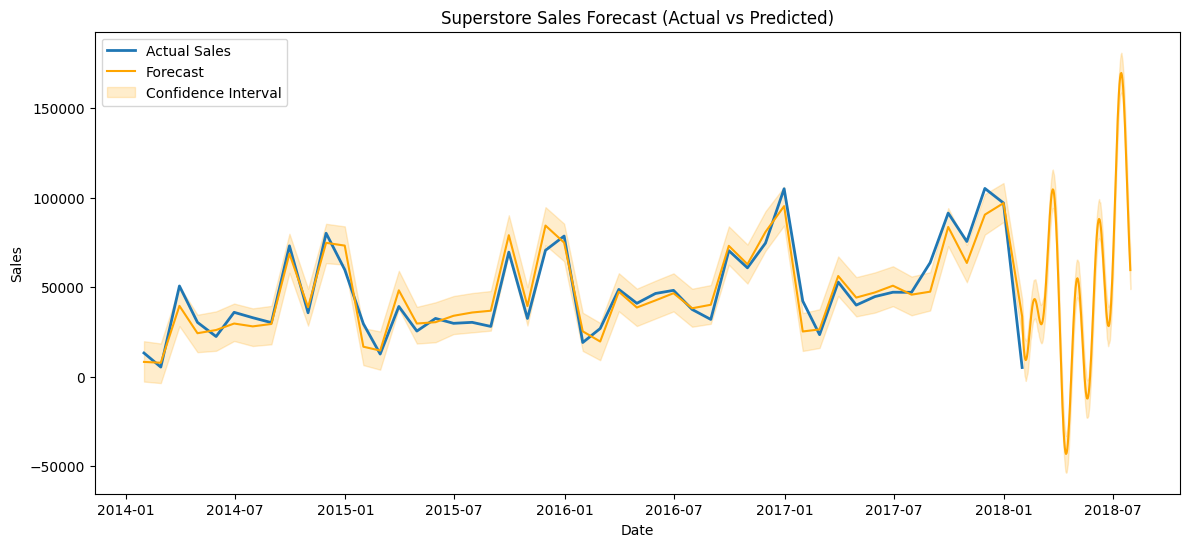

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(prophet_data['ds'], prophet_data['y'], label="Actual Sales", linewidth=2)
plt.plot(forecast['ds'], forecast['yhat'], label="Forecast", color="orange")
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                 color="orange", alpha=0.2, label="Confidence Interval")
plt.title("Superstore Sales Forecast (Actual vs Predicted)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [46]:
# Forecasted sales in the next 30 / 90 / 180 days
future_30 = forecast.tail(30)['yhat'].sum()
future_90 = forecast.tail(90)['yhat'].sum()
future_180 = forecast.tail(180)['yhat'].sum()

print("Predicted Sales in Next 30 Days:", round(future_30, 2))
print("Predicted Sales in Next 90 Days:", round(future_90, 2))
print("Predicted Sales in Next 180 Days:", round(future_180, 2))


Predicted Sales in Next 30 Days: 3709872.69
Predicted Sales in Next 90 Days: 6060651.79
Predicted Sales in Next 180 Days: 8954900.39


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Features and target
X = sales_data[['Discount', 'Quantity', 'Profit']]
y = sales_data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Evaluation
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Feature importance
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


R^2 Score: -0.15181720106064334
MAE: 245.07556984450258
          Coefficient
Discount   249.571780
Quantity    41.550264
Profit       1.561674
